#### Tecnologie dei dati e del linguaggio
# Dati e informazione
### Prof. Alfio Ferrara


## Introduzione al trattamento del dato testuale
I dati sono tratti dal [dataset online](https://www.kaggle.com/datasets/edoardoscarpaci/italian-food-recipes)

In [2]:
import pandas as pd
import numpy as np
from data.recipedata import ItalianRecipes

In [3]:
R = ItalianRecipes(file_path="/Users/Flint/Data/recipes/it_recipes.csv")

In [4]:
docs = [x for x in R.df['Steps'].values if not pd.isnull(x)]

In [5]:
for doc in docs[:10]:
    print(f"{doc}\n")

Per preparare il tiramisù preparate il caffé con la moka per ottenerne 300 g, poi zuccherate a piacere (noi abbiamo messo un cucchiaino) e lasciatelo raffreddare in una ciotolina bassa e ampia. Separate le uova dividendo gli albumi dai tuorli ricordando che per montare bene gli albumi non dovranno presentare alcuna traccia di tuorlo. Montate i tuorli con le fruste elettriche, versando solo metà dose di zucchero Non appena il composto sarà diventato chiaro e spumoso, e con le fruste ancora in funzione, potrete aggiungere il mascarpone, poco alla volta Incorporato tutto il formaggio avrete ottenuto una crema densa e compatta Quando saranno schiumosi versate il restante zucchero un po’ alla volta Dovrete montarli a neve ben ferma così stempererete il composto. Dopodiché procedete ad aggiungere la restante parte di albumi, poco alla volta mescolando molto delicatamente dal basso verso l'alto La crema al mascarpone è ora pronta Distribuitene una generosa cucchiaiata sul fondo di una pirofil

**Che tipo di operazioni e applicazioni vogliamo realizzare coi dati testuali?**
- estrazione di informazione
    - estrazione di argomenti (topic)
    - estrazione di conoscenza
    - named entitiy recognition
- ricerca
    - question answering
- riassumere
    - schematizzare
- generare il testo
- tradurre
- opinion mining
    - sentiment analysis
    - emotion mining
- classificare

Per capire quanto una operazione può essere difficile per una macchina, proviamo a sforzarci di "vedere" il testo come lo vede la macchina

In [6]:
from nlp.utils import messy_text

In [7]:
for text in docs[:10]:
    print(f"{messy_text(text)}\n")

gS5’95S9c5c5S’MI’2M5cEM3!’95S9c5c2S’MI’acQQ(’aAD’Ic’EALc’9S5’A22SDS5DS’svv’Pà’9AM’-1aaNS5c2S’c’9McaS5S’éDAM’cbbMcEA’ES33A’1D’a1aaNMcMDAè’S’Ic3aMc2SIA’5cQQ5STTc5S’MD’1Dc’aMA2AIMDc’bc33c’S’cE9Mcx’eS9c5c2S’IS’1A0c’TM0MTSDTA’PIM’cIb1EM’TcM’21A5IM’5MaA5TcDTA’aNS’9S5’EAD2c5S’bSDS’PIM’cIb1EM’DAD’TA05cDDA’95S3SD2c5S’cIa1Dc’25caaMc’TM’21A5IAx’iAD2c2S’M’21A5IM’aAD’IS’Q5132S’SIS225MaNSà’0S53cDTA’3AIA’ES2,’TA3S’TM’-1aaNS5A’hAD’c99SDc’MI’aAE9A32A’3c5,’TM0SD2c2A’aNMc5A’S’391EA3Aà’S’aAD’IS’Q5132S’cDaA5c’MD’Q1D-MADSà’9A25S2S’cPPM1DPS5S’MI’Ec3ac59ADSà’9AaA’cIIc’0AI2c’lDaA59A5c2A’2122A’MI’QA5EcPPMA’c05S2S’A22SD12A’1Dc’a5SEc’TSD3c’S’aAE9c22c’f1cDTA’3c5cDDA’3aNM1EA3M’0S53c2S’MI’5S32cD2S’-1aaNS5A’1D’9A ’cIIc’0AI2c’nA05S2S’EAD2c5IM’c’DS0S’bSD’QS5Ec’aA3'’32SE9S5S5S2S’MI’aAE9A32Ax’nA9ATMaN(’95AaSTS2S’cT’cPPM1DPS5S’Ic’5S32cD2S’9c52S’TM’cIb1EMà’9AaA’cIIc’0AI2c’ES3aAIcDTA’EAI2A’TSIMac2cESD2S’TcI’bc33A’0S53A’IìcI2A’kc’a5SEc’cI’Ec3ac59ADS’)’A5c’95AD2c’nM325Mb1M2SDS’1Dc’PSDS5A3c’a1aaNMcMc2c’31I’QADTA’TM’1Dc’9M5AQMI

## Vector Space Model
Un modo di trasformare il testo in qualcosa che la macchina può computare possiamo individuare una forma vettoriale per il testo usando alcune sue caratteristiche.

In [8]:
from nltk.tokenize import sent_tokenize

In [9]:
example = "\n".join(sent_tokenize(docs[0]))
print(example)

Per preparare il tiramisù preparate il caffé con la moka per ottenerne 300 g, poi zuccherate a piacere (noi abbiamo messo un cucchiaino) e lasciatelo raffreddare in una ciotolina bassa e ampia.
Separate le uova dividendo gli albumi dai tuorli ricordando che per montare bene gli albumi non dovranno presentare alcuna traccia di tuorlo.
Montate i tuorli con le fruste elettriche, versando solo metà dose di zucchero Non appena il composto sarà diventato chiaro e spumoso, e con le fruste ancora in funzione, potrete aggiungere il mascarpone, poco alla volta Incorporato tutto il formaggio avrete ottenuto una crema densa e compatta Quando saranno schiumosi versate il restante zucchero un po’ alla volta Dovrete montarli a neve ben ferma così stempererete il composto.
Dopodiché procedete ad aggiungere la restante parte di albumi, poco alla volta mescolando molto delicatamente dal basso verso l'alto La crema al mascarpone è ora pronta Distribuitene una generosa cucchiaiata sul fondo di una pirofil

In [10]:
print(example.split())

['Per', 'preparare', 'il', 'tiramisù', 'preparate', 'il', 'caffé', 'con', 'la', 'moka', 'per', 'ottenerne', '300', 'g,', 'poi', 'zuccherate', 'a', 'piacere', '(noi', 'abbiamo', 'messo', 'un', 'cucchiaino)', 'e', 'lasciatelo', 'raffreddare', 'in', 'una', 'ciotolina', 'bassa', 'e', 'ampia.', 'Separate', 'le', 'uova', 'dividendo', 'gli', 'albumi', 'dai', 'tuorli', 'ricordando', 'che', 'per', 'montare', 'bene', 'gli', 'albumi', 'non', 'dovranno', 'presentare', 'alcuna', 'traccia', 'di', 'tuorlo.', 'Montate', 'i', 'tuorli', 'con', 'le', 'fruste', 'elettriche,', 'versando', 'solo', 'metà', 'dose', 'di', 'zucchero', 'Non', 'appena', 'il', 'composto', 'sarà', 'diventato', 'chiaro', 'e', 'spumoso,', 'e', 'con', 'le', 'fruste', 'ancora', 'in', 'funzione,', 'potrete', 'aggiungere', 'il', 'mascarpone,', 'poco', 'alla', 'volta', 'Incorporato', 'tutto', 'il', 'formaggio', 'avrete', 'ottenuto', 'una', 'crema', 'densa', 'e', 'compatta', 'Quando', 'saranno', 'schiumosi', 'versate', 'il', 'restante', 'z

In [11]:
def features(text):
    return np.array([len(text), len([x for x in text if x.isupper()]) / len(text)])

In [12]:
D = np.array([features(d) for d in docs])
D 

array([[1.73200000e+03, 9.81524249e-03],
       [7.62000000e+02, 1.44356955e-02],
       [1.45500000e+03, 8.93470790e-03],
       ...,
       [1.07500000e+03, 1.39534884e-02],
       [6.97000000e+02, 2.29555237e-02],
       [1.15500000e+03, 1.29870130e-02]], shape=(5935, 2))

In [13]:
import matplotlib.pyplot as plt

**Scaliamo i dati**

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
S = scaler.fit_transform(D)
row_norms = np.linalg.norm(S, axis=1, keepdims=True)
row_norms[row_norms == 0] = 1
U = S / row_norms

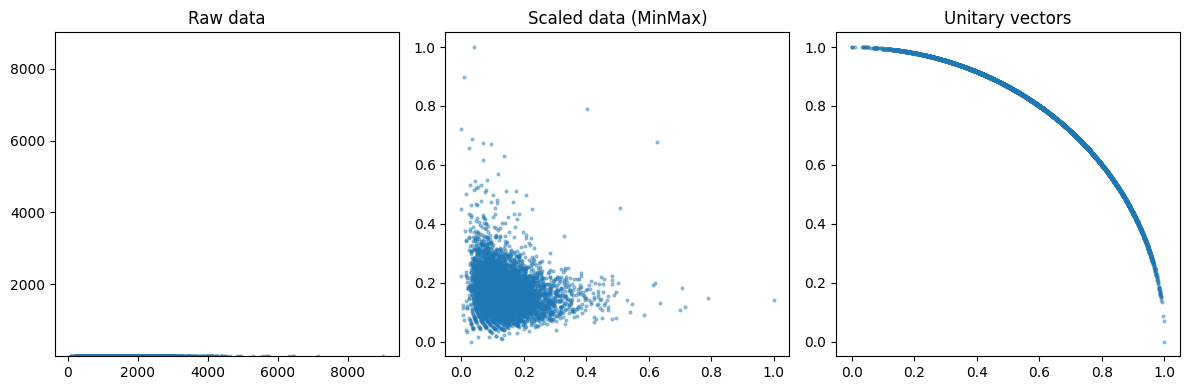

In [16]:
fig, ax = plt.subplots(figsize=(12, 4), ncols=3)
ax[0].scatter(D[:,0], D[:,1], s=4, alpha=.4)
ax[0].set_ylim((D.min(), D.max()+1))
ax[0].set_title('Raw data')
ax[1].scatter(S[:,0], S[:,1], s=4, alpha=.4)
ax[1].set_title('Scaled data (MinMax)')
ax[2].scatter(U[:,0], U[:,1], s=4, alpha=.4)
ax[2].set_title('Unitary vectors')
plt.tight_layout()
plt.show()

## Usare le parole come dimensioni

### Tokenizzazione per espressioni regolari

In [17]:
from nltk.tokenize import word_tokenize

In [18]:
for doc in docs[:10]:
    print(word_tokenize(doc, language='italian'))

['Per', 'preparare', 'il', 'tiramisù', 'preparate', 'il', 'caffé', 'con', 'la', 'moka', 'per', 'ottenerne', '300', 'g', ',', 'poi', 'zuccherate', 'a', 'piacere', '(', 'noi', 'abbiamo', 'messo', 'un', 'cucchiaino', ')', 'e', 'lasciatelo', 'raffreddare', 'in', 'una', 'ciotolina', 'bassa', 'e', 'ampia', '.', 'Separate', 'le', 'uova', 'dividendo', 'gli', 'albumi', 'dai', 'tuorli', 'ricordando', 'che', 'per', 'montare', 'bene', 'gli', 'albumi', 'non', 'dovranno', 'presentare', 'alcuna', 'traccia', 'di', 'tuorlo', '.', 'Montate', 'i', 'tuorli', 'con', 'le', 'fruste', 'elettriche', ',', 'versando', 'solo', 'metà', 'dose', 'di', 'zucchero', 'Non', 'appena', 'il', 'composto', 'sarà', 'diventato', 'chiaro', 'e', 'spumoso', ',', 'e', 'con', 'le', 'fruste', 'ancora', 'in', 'funzione', ',', 'potrete', 'aggiungere', 'il', 'mascarpone', ',', 'poco', 'alla', 'volta', 'Incorporato', 'tutto', 'il', 'formaggio', 'avrete', 'ottenuto', 'una', 'crema', 'densa', 'e', 'compatta', 'Quando', 'saranno', 'schiumo

### Tokenizzatori basati su modelli linguistici

In [19]:
import spacy
from spacy.displacy import render

In [20]:
nlp = spacy.load('it_core_news_lg')

In [21]:
tokens = []
for token in nlp(docs[0]):
    tokens.append({'text': token.text, 'lemma': token.lemma_, 'pos': token.pos_, 
                   'tag': token.tag_, 'dep': token.dep_, 'shape': token.shape_, 
                   'alpha': token.is_alpha, 'stopword': token.is_stop})
T = pd.DataFrame(tokens)

In [22]:
T.head(20)

,text,lemma,pos,tag,dep,shape,alpha,stopword
0,Per,per,ADP,E,mark,Xxx,True,True
1,preparare,preparare,VERB,V,advcl,xxxx,True,False
2,il,il,DET,RD,det,xx,True,True
3,tiramisù,tiramisù,NOUN,S,obj,xxxx,True,False
4,preparate,preparare,VERB,V,acl,xxxx,True,False
5,il,il,DET,RD,det,xx,True,True
6,caffé,caffé,NOUN,S,obj,xxxx,True,False
7,con,con,ADP,E,case,xxx,True,True
8,la,il,DET,RD,det,xx,True,True
9,moka,moka,NOUN,S,obl,xxxx,True,False


In [23]:
sentence = "Per preparare il tiramisù preparate il caffé con la moka"
render(nlp(sentence))

In [24]:
def spacy_tokenizer(text, lowercase=True, lemma=True, keep_pos=None):
    def selector(token, lemma=lemma, keep_pos=keep_pos):
        if keep_pos is None or token.pos_ in keep_pos:
            if lemma:
                return token.lemma_ 
            else:
                return token.text 
    tokens = []
    for token in nlp(text):
        s = selector(token)
        if s is not None:
            if lowercase:
                tokens.append(s.lower())
            else:
                tokens.append(s)
    return tokens

In [25]:
for doc in docs[:10]:
    print(spacy_tokenizer(doc, lowercase=True, lemma=True, keep_pos=['PROPN', 'VERB', 'ADJ', 'ADV', 'AUX']))

['preparare', 'preparare', 'ottenere ne', 'poi', 'zuccherare', 'avere', 'mettere', 'lasciatelo', 'raffreddare', 'basso', 'ampio', 'separate', 'dividere', 'ricordare', 'montare', 'bene', 'non', 'dovere', 'presentare', 'montate', 'elettrico', 'versare', 'solo', 'non', 'essere', 'diventare', 'chiaro', 'spumoso', 'ancora', 'potrete', 'aggiungere', 'poco', 'incorporare', 'avere', 'ottenere', 'denso', 'compatto', 'essere', 'schiumosi', 'versare', 'restante', 'po’', 'dovrete', 'montare li', 'bene', 'fermare', 'così', 'stemperereto', 'dopodiché', 'procedete', 'aggiungere', 'restante', 'poco', 'mescolare', 'molto', 'delicatamente', 'alto', 'essere', 'ora', 'pronto', 'distribuitene', 'generoso', 'grande', 'distribuire', 'bene', 'inzuppate', 'freddo', 'prima', 'poi', 'altro', 'distribuire', 'imbevere', 'cercare', 'sistemare li', 'così', 'ottenere', 'primo', 'aggiungete', 'livellatelare', 'coprire li', 'completamente', 'continuare', 'distribuire', 'imbevere', 'poi', 'realizzare', 'altro', 'trasfer

### Size of the vocabulary with different types of tokenizers

In [26]:
from collections import defaultdict
from tqdm.notebook import tqdm

In [27]:
nltk_vocabulary = defaultdict(lambda: 0)
spacy_vocabulary = defaultdict(lambda: 0)
step = 10

def counter(docs: list, tokenizer: callable, vocabulary: dict, step: int = 10):
    run = list(enumerate(docs))
    stats = []
    for i, doc in tqdm(run):
        if i % step == 0:
            stats.append(len(vocabulary))
        for token in tokenizer(doc):
            vocabulary[token] += 1
    return stats 

nltk_stats = counter(docs, word_tokenize, nltk_vocabulary, step=step)
spacy_stats = counter(docs, spacy_tokenizer, spacy_vocabulary, step=step)


  0%|          | 0/5935 [00:00<?, ?it/s]

  0%|          | 0/5935 [00:00<?, ?it/s]

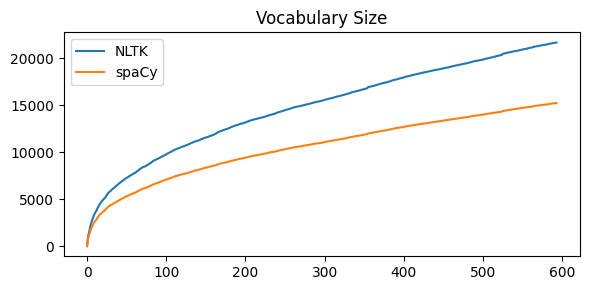

In [28]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_title('Vocabulary Size')
ax.plot(nltk_stats, label='NLTK')
ax.plot(spacy_stats, label='spaCy')
ax.legend()
plt.tight_layout()
plt.show()

### Un esempio di motore di ricerca
Utilizziamo la tokenizzazione per costruire un semplice motore di ricerca:
- tokenizzatore
- vettorizzatore
- misuratore di distanze

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
def tokenize(text):
    return [x.lower() for x in word_tokenize(text, language='italian')]

In [31]:
vectorizer = CountVectorizer(tokenizer=tokenize, token_pattern=None)
X_sparse = vectorizer.fit_transform(docs)
X = X_sparse.toarray()

vocabulary = vectorizer.get_feature_names_out()
Xdf = pd.DataFrame(X, columns=vocabulary)

In [32]:
Xdf.head()

,!,%,&,','','mpacchiuse,'ncasciata,'nduja,'s,(,...,éclair,ìo,–,–tenendone,‘,’,“,”,…,…buon
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,2,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,2,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,3,0,0,0,0


In [33]:
Xdf.loc[0].sort_values(ascending=False).head(20)

e             10
,              9
di             9
il             8
un             7
per            7
la             6
in             6
con            5
crema          5
una            4
i              4
.              4
a              3
albumi         3
volta          3
mascarpone     3
poi            3
da             3
le             3
Name: 0, dtype: int64

In [34]:
q = "un dolce con mascarpone, uova e zucchero e vaniglia con anche la meringa"
qv = vectorizer.transform([q]).toarray()
pd.Series(qv[0], index=vocabulary).sort_values(ascending=False)

e               2
con             2
uova            1
zucchero        1
meringa         1
               ..
erbettesenza    0
erbette         0
erbe.mettete    0
erbe            0
…buon           0
Length: 20106, dtype: int64

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
search = cosine_similarity(qv, X)
sigma = pd.Series(search[0]).sort_values(ascending=False)
sigma.head(6)

4577    0.580695
2131    0.562059
457     0.558849
3908    0.553596
5540    0.547355
2165    0.546326
dtype: float64

In [37]:
answer = 4577
print("\n".join([x for x in sent_tokenize(docs[answer])]))

Per preparare la torta libro, iniziate dalla realizzazione del con il metodo diviso a freddo.
Prendete le uova, che dovranno essere a temperatura ambiente, e dividete accuratamente i tuorli dagli albumi.
Ponete quindi gli albumi nella ciotola della planetaria e aggiungete circa 1/3 dello zucchero e non a neve.
Otterrete così un composto spumoso e non a fiocchi; tenetelo da parte e nel frattempo unite la parte restante di zucchero ai tuorli Iniziate a montare anche questi, con uno sbattitore, e una volta ottenuto un composto spumoso, con una buona alveolatura e di colore giallo chiaro, unite i semi della bacca di vaniglia direttamente sul composto,e aiutandovi con una spatola amalgamate delicatamente tutti gli ingredienti Imburrate e infarinate l’apposita teglia, dalle dimensioni 35x28 cm, versatevi il composto Infornate in forno statico preriscaldato a 180°C per 60-70 minuti (160° per circa 50-60 minuti se forno ventilato) .
Una volta sfornato il dolce lasciatelo intiepidire nello stam

### Tokenizzazione per apprendimento

Per un'introduzione sui metodi basati su WOrdPiece si veda [WordPiece Example](./wordpiece.ipynb)

WordPiece è un algoritmo di tokenizzazione basato su sotto-parole, comunemente utilizzato nei modelli basati su trasformatori come BERT. Migliora l'efficienza bilanciando la dimensione del vocabolario e la capacità di rappresentazione. L'obiettivo dell'addestramento è costruire un vocabolario ottimale a partire da dati testuali grezzi, equilibrando la dimensione del vocabolario con l'efficienza delle sotto-parole.

#### Passo 1: Iniziamo con un vocabolario base
Il vocabolario iniziale contiene tutti i singoli caratteri Unicode (A-Z, a-z, 0-9, punteggiatura), oltre a token speciali come `[UNK]`.

#### Passo 2: Calcolare la frequenza di sotto-sequenze di caratteri
Scansioniamo il corpus di addestramento e contiamo la frequenza di ogni coppia di token (inizialmente ogni carattere è considerato un token), contrassegnando con un carattere speciale i token che non sono quelli iniziali.

In [38]:
import nltk

In [39]:
corpus = ["mescolo", "mescolare", "mescolavo", "mescoli"]
vocabulary = defaultdict(lambda: 0)
c_prefix = "##"

def update_vocabulary(corpus, vocabulary, c_prefix):
    for text in corpus:
        for i, (a, b) in enumerate(nltk.ngrams(text, n=2)):
            if i == 0:
                vocabulary[(a, f"{c_prefix}{b}")] += 1
            else:
                vocabulary[(f"{c_prefix}{a}", f"{c_prefix}{b}")] += 1

update_vocabulary(corpus=corpus, vocabulary=vocabulary, c_prefix=c_prefix)

pd.Series(vocabulary).sort_values(ascending=False)

m    ##e    4
##e  ##s    4
##s  ##c    4
##c  ##o    4
##o  ##l    4
##l  ##a    2
     ##o    1
##a  ##r    1
##r  ##e    1
##a  ##v    1
##v  ##o    1
##l  ##i    1
dtype: int64

#### Passo 3: Combinare le coppie più frequenti e creare nuovi token
Uniamo la coppia di token più frequente e aggiorniamo il vocabolario e il corpus sostituendo questa sequenza con un singolo token.

In [40]:
pair = list(pd.Series(vocabulary).sort_values(ascending=False).head(1).keys())[0]
new_token = f"{pair[0].replace(c_prefix, '')}{pair[1].replace(c_prefix, '')}"

vocabulary[new_token] = vocabulary[pair]

def wordpiece_split(word, vocabulary):
    tokens = []
    i = 0
    while i < len(word):
        matched = None
        for j in range(len(word), i, -1):
            subword = word[i:j]
            if subword in vocabulary:
                matched = subword
                break
        if matched is None:
            matched = word[i]
        tokens.append(matched)
        i += len(matched)
    return tokens

print(wordpiece_split("mesco", vocabulary=vocabulary))
print(wordpiece_split("ciao", vocabulary=vocabulary))
#print(wordpiece_split("metto", vocabulary=vocabulary))

new_corpus = []
for text in corpus:
    tokens = wordpiece_split(text, vocabulary=vocabulary)
    new_corpus.append(tokens)

corpus = new_corpus

['me', 's', 'c', 'o']
['c', 'i', 'a', 'o']


In [41]:
corpus

[['me', 's', 'c', 'o', 'l', 'o'],
 ['me', 's', 'c', 'o', 'l', 'a', 'r', 'e'],
 ['me', 's', 'c', 'o', 'l', 'a', 'v', 'o'],
 ['me', 's', 'c', 'o', 'l', 'i']]

#### Passo 4: Ripetere fino a raggiungere la dimensione massima del vocabolario
Da quel momento in poi, tutte le porzioni di stringa che non trovano corrispondenza resteranno inalterate.


In [42]:
update_vocabulary(corpus=corpus, vocabulary=vocabulary, c_prefix=c_prefix)

In [43]:
pd.Series(vocabulary).sort_values(ascending=False)

(##s, ##c)    8
(##c, ##o)    8
(##o, ##l)    8
(m, ##e)      4
(##e, ##s)    4
(##l, ##a)    4
me            4
(me, ##s)     4
(##l, ##o)    2
(##a, ##r)    2
(##r, ##e)    2
(##a, ##v)    2
(##v, ##o)    2
(##l, ##i)    2
dtype: int64

In [44]:
pair = list(pd.Series(vocabulary).sort_values(ascending=False).head(1).keys())[0]
new_token = f"{pair[0].replace(c_prefix, '')}{pair[1].replace(c_prefix, '')}"

print(new_token)

vocabulary[new_token] = vocabulary[pair]

new_corpus = []
for text in corpus:
    tokens = wordpiece_split("".join(text), vocabulary=vocabulary)
    new_corpus.append(tokens)

corpus = new_corpus

print(corpus)

sc
[['me', 'sc', 'o', 'l', 'o'], ['me', 'sc', 'o', 'l', 'a', 'r', 'e'], ['me', 'sc', 'o', 'l', 'a', 'v', 'o'], ['me', 'sc', 'o', 'l', 'i']]


Nota: questa implementazione ingenua non funziona completamente; per un esempio utilizzabile, puoi controllare qui: [WordPieace](./wordpiece.ipynb)